In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2FwdXJ2YW5ha2FkZS9HaXRodWIvTW9udGUtQ2FybG8tTWV0aG9kcy9jaGFwdGVycy9lc3RpbWF0aW9u'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/2y/zsgtjj415jdb0d4y2b_wx7th0000gn/T/ipykernel_61119/2528839951.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708117302.8894389, "/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708117302.895673, "/Users/apurvanakade/miniconda3/lib/python3.12/zipimport.py": 1708117300.842618, "/Users/apurvanakade/miniconda3/lib/python3.12/codecs.py": 1708117300.2231953, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/aliases.py": 1708117301.4904184, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/__init__.py": 1708117301.4862745, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/utf_8.py": 1708117302.0979323, "/Users/apurvanakade/miniconda3/lib/python3.12/abc.py": 1708117300.1248448, "/Users/apurvanakade/miniconda3/lib/python3.12/io.py": 1708117300.4300423, "/Users/apurvanakade/miniconda3/lib/python3.12/stat.py": 1708117300.6806324, "/Users/apurvanakade/miniconda3/lib/python3.12/_collections_abc.py": 1708117300.0486746, "/Users/apurvanakade/miniconda3/lib/python3.12/genericpath.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import integrate
import pandas as pd

plt.style.use('seaborn-v0_8')
np.random.seed(42)

def monte_carlo_integrate(f, a, b, n_samples):
    """Monte Carlo integration of f over [a,b]"""
    x_samples = np.random.uniform(a, b, n_samples)
    f_values = f(x_samples)
    return (b - a) * np.mean(f_values), f_values, x_samples

/var/folders/2y/zsgtjj415jdb0d4y2b_wx7th0000gn/T/ipykernel_61119/2166419609.py:92: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



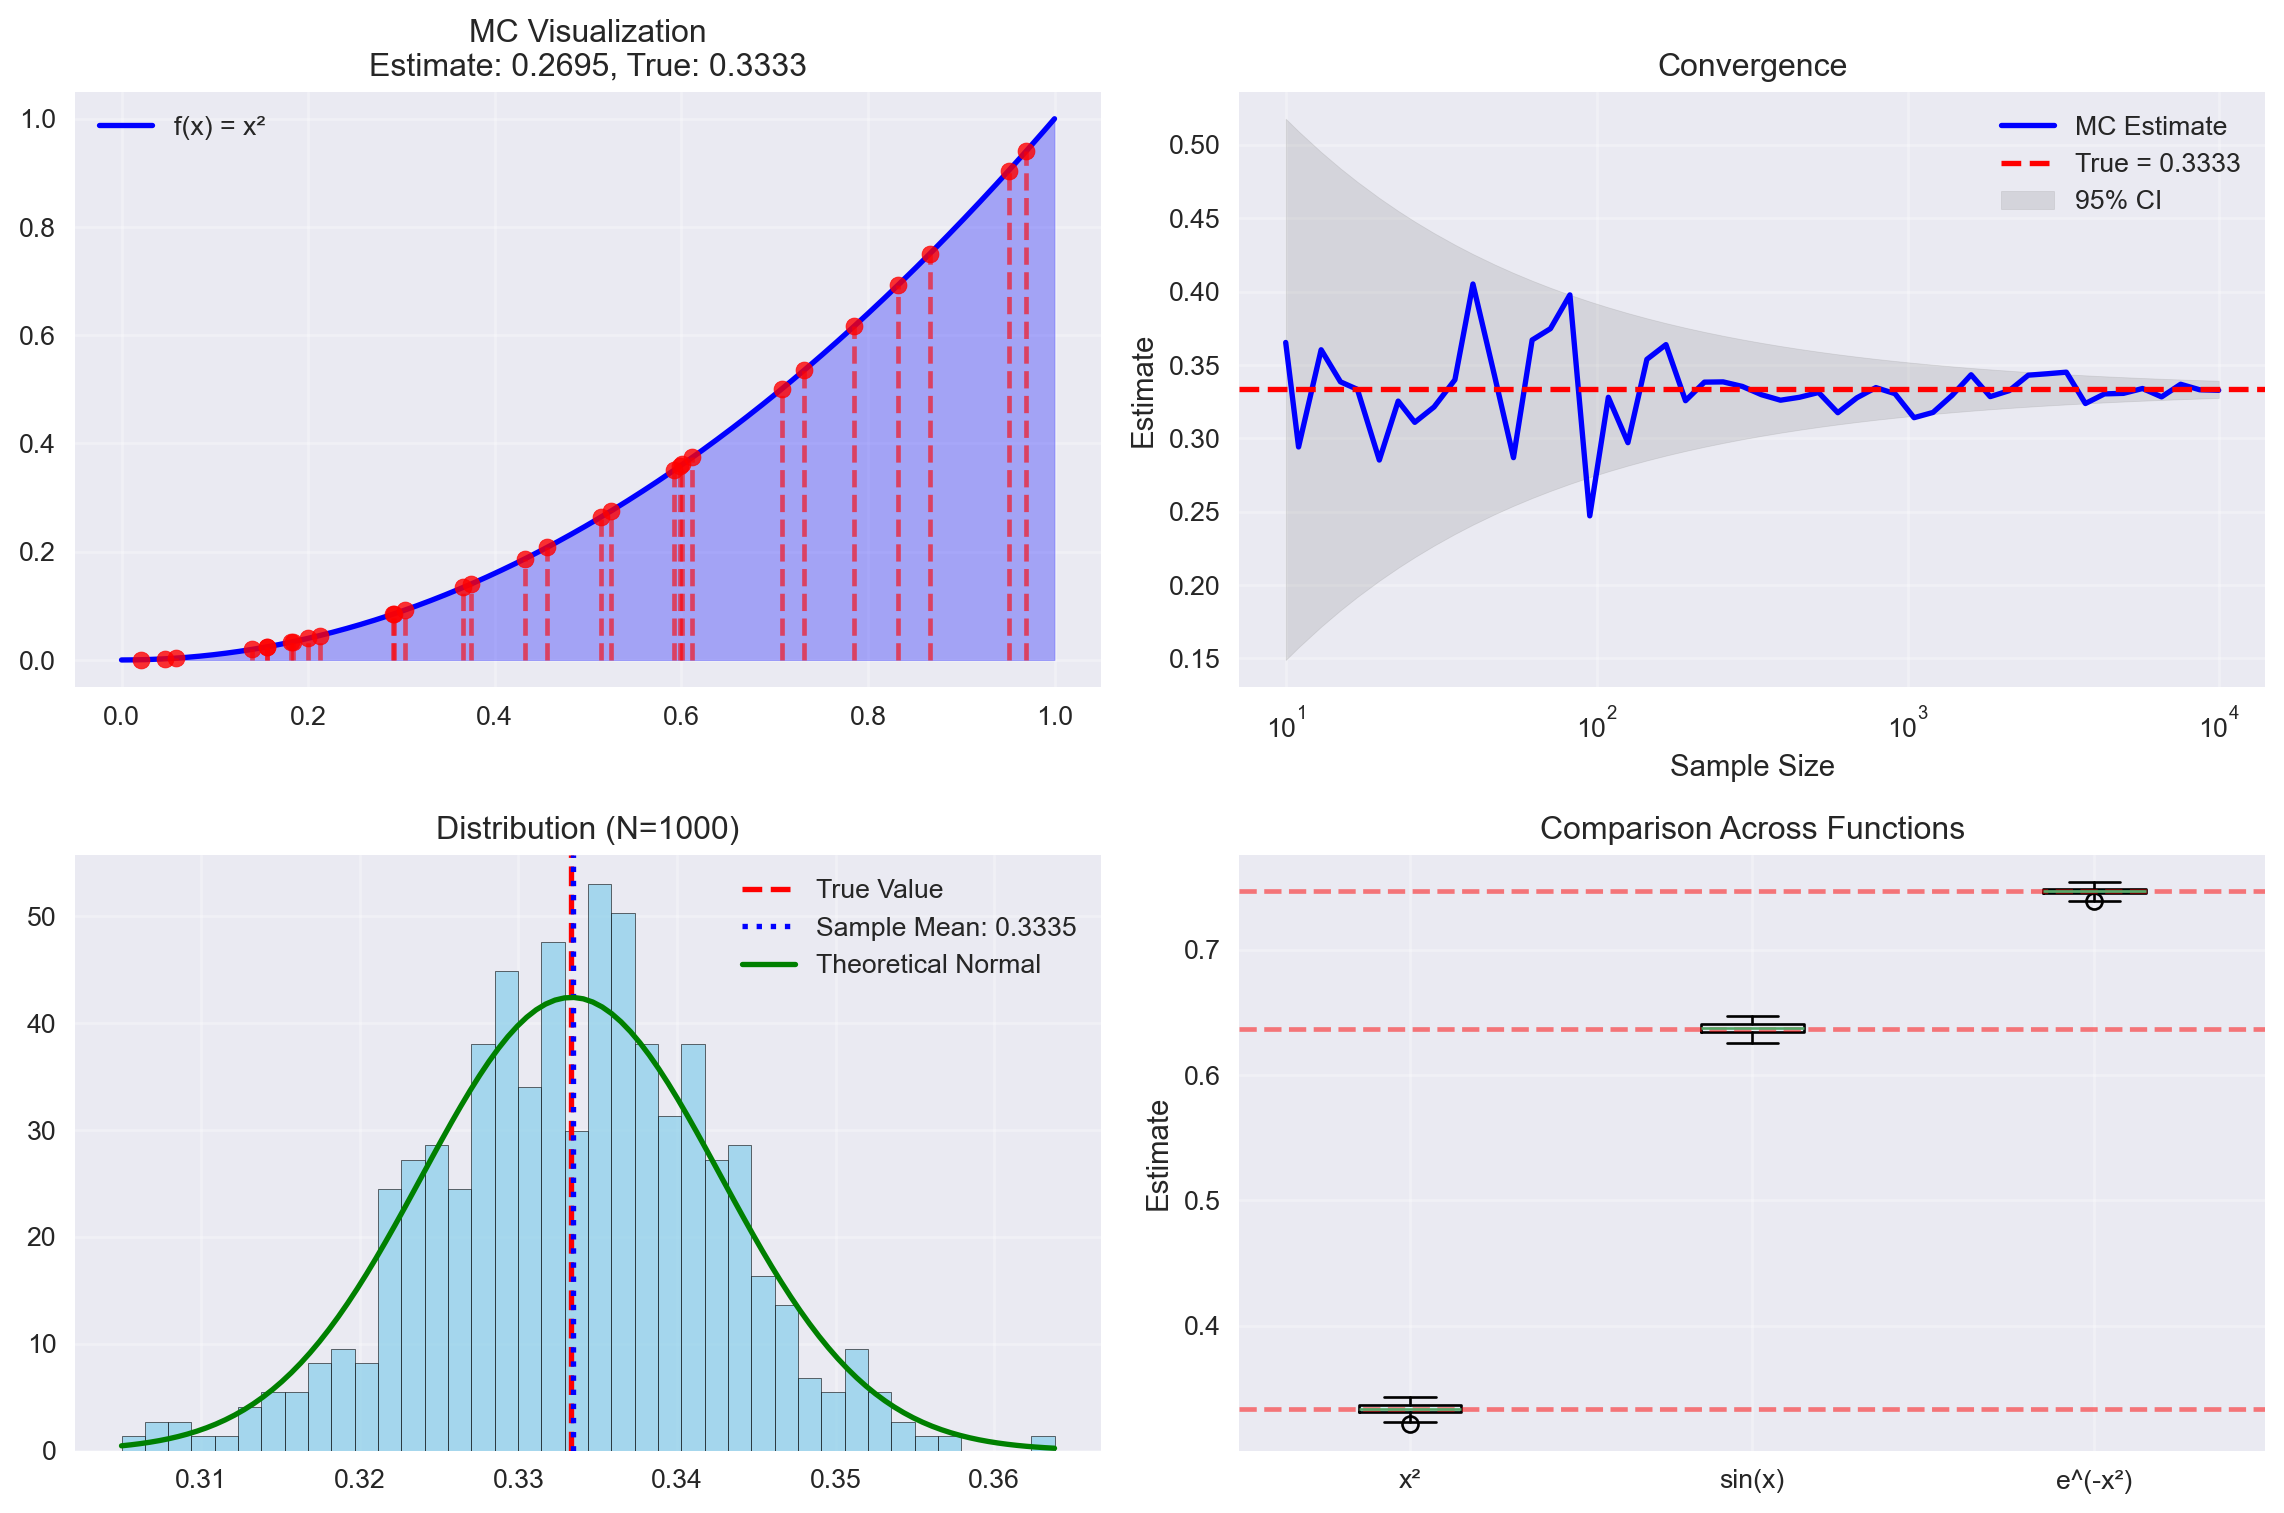

In [3]:
#| label: fig-polynomial
#| fig-cap: Monte Carlo integration of f(x) = x² over [0,1]

# Define function and analytical solution
def f(x):
    return x**2

a, b = 0, 1
analytical = 1/3  # ∫₀¹ x² dx = 1/3

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Visualization of method
x_plot = np.linspace(a, b, 1000)
ax1.plot(x_plot, f(x_plot), 'b-', linewidth=2, label='f(x) = x²')
ax1.fill_between(x_plot, 0, f(x_plot), alpha=0.3, color='blue')

# Show sample points
n_vis = 30
x_samples = np.random.uniform(a, b, n_vis)
y_samples = f(x_samples)
ax1.scatter(x_samples, y_samples, color='red', s=40, alpha=0.8, zorder=5)
ax1.vlines(x_samples, 0, y_samples, colors='red', alpha=0.6, linestyles='--')

estimate = (b - a) * np.mean(y_samples)
ax1.set_title(f'MC Visualization\nEstimate: {estimate:.4f}, True: {analytical:.4f}')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Convergence analysis
sample_sizes = np.logspace(1, 4, 50).astype(int)
estimates = []

for n in sample_sizes:
    est, _, _ = monte_carlo_integrate(f, a, b, n)
    estimates.append(est)

ax2.semilogx(sample_sizes, estimates, 'b-', linewidth=2, label='MC Estimate')
ax2.axhline(y=analytical, color='red', linestyle='--', linewidth=2, label=f'True = {analytical:.4f}')

# Theoretical confidence bands
_, f_vals, _ = monte_carlo_integrate(f, a, b, 50000)
sigma_f = np.std(f_vals)
se = (b - a) * sigma_f / np.sqrt(sample_sizes)
ax2.fill_between(sample_sizes, analytical - 1.96*se, analytical + 1.96*se, 
                alpha=0.2, color='gray', label='95% CI')

ax2.set_xlabel('Sample Size')
ax2.set_ylabel('Estimate')
ax2.set_title('Convergence')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Error distribution
n_runs = 500
n_fixed = 1000
estimates_dist = []

for _ in range(n_runs):
    est, _, _ = monte_carlo_integrate(f, a, b, n_fixed)
    estimates_dist.append(est)

ax3.hist(estimates_dist, bins=40, density=True, alpha=0.7, color='skyblue', edgecolor='black')
ax3.axvline(x=analytical, color='red', linestyle='--', linewidth=2, label='True Value')
ax3.axvline(x=np.mean(estimates_dist), color='blue', linestyle=':', linewidth=2, 
           label=f'Sample Mean: {np.mean(estimates_dist):.4f}')

# Theoretical normal overlay
x_norm = np.linspace(min(estimates_dist), max(estimates_dist), 100)
theoretical_se = (b - a) * sigma_f / np.sqrt(n_fixed)
y_norm = (1/(theoretical_se * np.sqrt(2*np.pi))) * np.exp(-0.5*((x_norm - analytical)/theoretical_se)**2)
ax3.plot(x_norm, y_norm, 'g-', linewidth=2, label='Theoretical Normal')

ax3.set_title(f'Distribution (N={n_fixed})')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Comparison with different functions
functions = {
    'x²': (lambda x: x**2, 1/3),
    'sin(x)': (lambda x: np.sin(np.pi*x), 2/np.pi),
    'e^(-x²)': (lambda x: np.exp(-x**2), 0.7468)
}

sample_size = 5000
results = []

for name, (func, true_val) in functions.items():
    estimates_func = []
    for _ in range(100):
        est, _, _ = monte_carlo_integrate(func, 0, 1, sample_size)
        estimates_func.append(est)
    results.append(estimates_func)

ax4.boxplot(results, labels=list(functions.keys()))
for i, (name, (_, true_val)) in enumerate(functions.items()):
    ax4.axhline(y=true_val, color='red', alpha=0.5, linestyle='--')

ax4.set_ylabel('Estimate')
ax4.set_title('Comparison Across Functions')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [4]:
#| label: tbl-performance
#| tbl-cap: Monte Carlo integration performance comparison

def performance_analysis():
    test_functions = {
        'Polynomial x²': (lambda x: x**2, (0, 1), 1/3, 'Easy'),
        'Trigonometric': (lambda x: np.sin(x), (0, np.pi), 2.0, 'Easy'),
        'Gaussian': (lambda x: np.exp(-x**2), (-2, 2), np.sqrt(np.pi)*1.995, 'Medium'),
        'Oscillatory': (lambda x: np.sin(10*x)*np.exp(-x), (0, 2), None, 'Hard')
    }
    
    results = []
    sample_sizes = [1000, 10000, 50000]
    
    for func_name, (func, interval, analytical, difficulty) in test_functions.items():
        a, b = interval
        
        # Get reference value
        if analytical is None:
            analytical, _ = integrate.quad(func, a, b)
        
        for n in sample_sizes:
            # Multiple runs for statistics
            estimates = []
            for _ in range(50):
                est, _, _ = monte_carlo_integrate(func, a, b, n)
                estimates.append(est)
            
            mean_est = np.mean(estimates)
            std_est = np.std(estimates)
            bias = mean_est - analytical
            rmse = np.sqrt(np.mean([(est - analytical)**2 for est in estimates]))
            
            results.append({
                'Function': func_name,
                'Difficulty': difficulty,
                'N': f'{n:,}',
                'Mean Est.': f'{mean_est:.5f}',
                'True Value': f'{analytical:.5f}',
                'Bias': f'{bias:.2e}',
                'Std Error': f'{std_est:.5f}',
                'RMSE': f'{rmse:.5f}'
            })
    
    return pd.DataFrame(results)

perf_df = performance_analysis()
print(perf_df.to_string(index=False))

     Function Difficulty      N Mean Est. True Value      Bias Std Error    RMSE
Polynomial x²       Easy  1,000   0.33260    0.33333 -7.38e-04   0.00695 0.00699
Polynomial x²       Easy 10,000   0.33328    0.33333 -5.23e-05   0.00295 0.00295
Polynomial x²       Easy 50,000   0.33343    0.33333  9.36e-05   0.00136 0.00137
Trigonometric       Easy  1,000   2.00187    2.00000  1.87e-03   0.03425 0.03430
Trigonometric       Easy 10,000   1.99934    2.00000 -6.63e-04   0.00950 0.00952
Trigonometric       Easy 50,000   1.99999    2.00000 -1.29e-05   0.00445 0.00445
     Gaussian     Medium  1,000   1.77181    3.53605 -1.76e+00   0.03760 1.76463
     Gaussian     Medium 10,000   1.76085    3.53605 -1.78e+00   0.01594 1.77527
     Gaussian     Medium 50,000   1.76559    3.53605 -1.77e+00   0.00604 1.77047
  Oscillatory       Hard  1,000   0.09445    0.09232  2.13e-03   0.02449 0.02458
  Oscillatory       Hard 10,000   0.09099    0.09232 -1.33e-03   0.00646 0.00659
  Oscillatory       Hard 50,

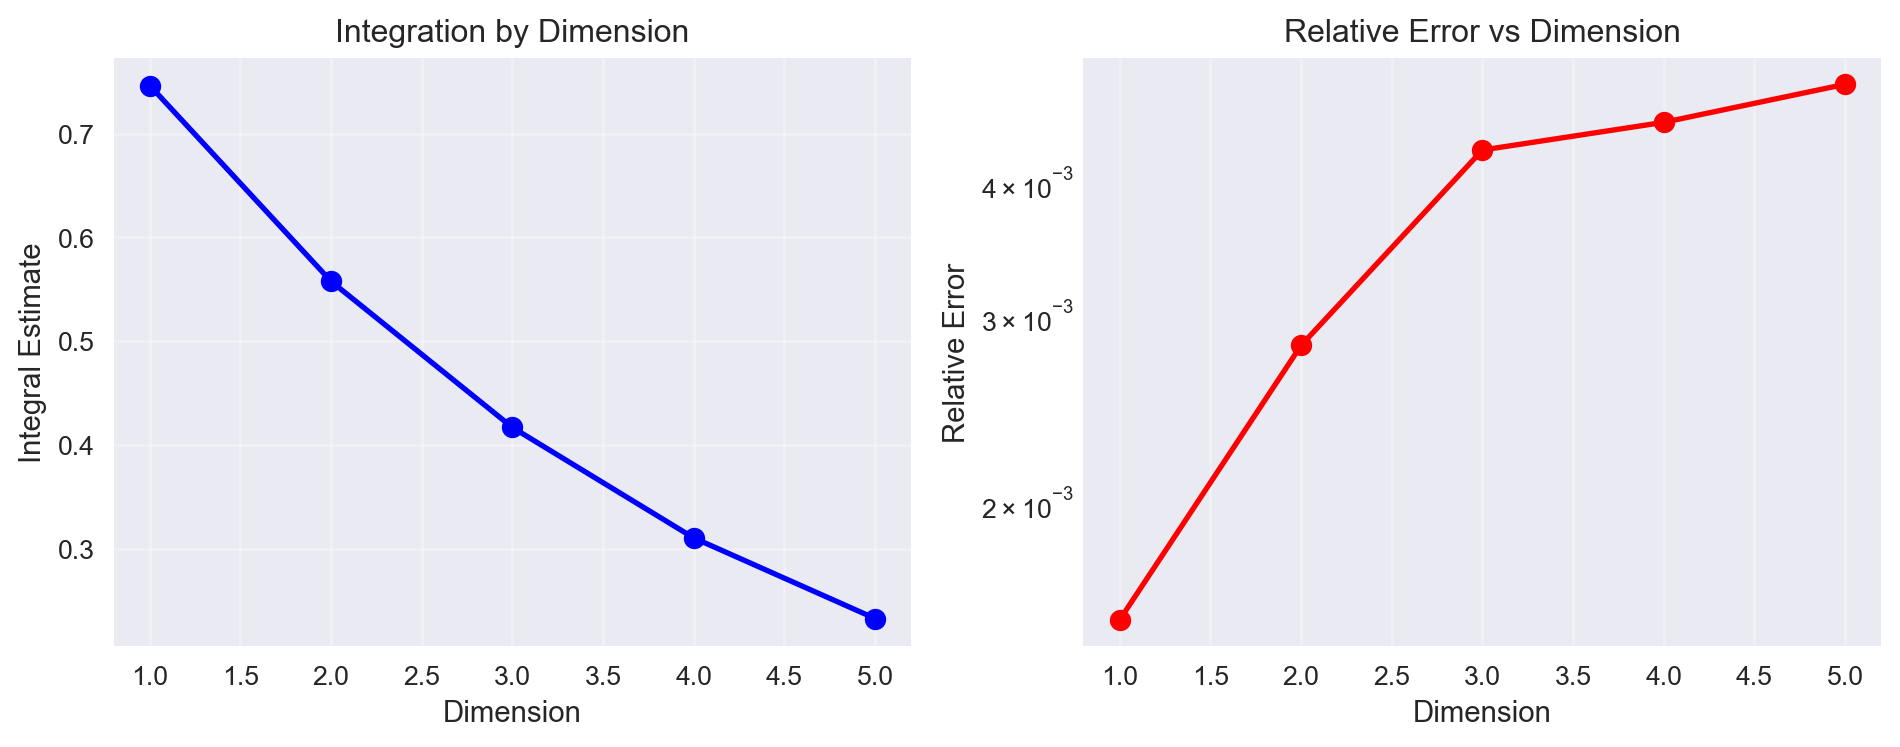


Multidimensional Integration Results:
 Dimension  Estimate  Std Error  Rel Error
         1  0.746402   0.001157   0.001550
         2  0.557660   0.001568   0.002811
         3  0.416808   0.001791   0.004296
         4  0.310369   0.001416   0.004562
         5  0.232712   0.001153   0.004954


In [5]:
#| label: fig-multidimensional
#| fig-cap: Monte Carlo advantage in higher dimensions

def multidimensional_example():
    """Demonstrate MC integration in higher dimensions"""
    
    # Function: exp(-||x||²) over unit hypercube
    def f_nd(points):
        return np.exp(-np.sum(points**2, axis=1))
    
    dimensions = [1, 2, 3, 4, 5]
    n_samples = 10000
    
    results = []
    
    for dim in dimensions:
        estimates = []
        for _ in range(20):  # Multiple runs
            # Sample points in [0,1]^d
            points = np.random.uniform(0, 1, (n_samples, dim))
            f_values = f_nd(points)
            estimate = np.mean(f_values)  # Volume of unit cube is 1
            estimates.append(estimate)
        
        mean_est = np.mean(estimates)
        std_est = np.std(estimates)
        
        results.append({
            'Dimension': dim,
            'Estimate': mean_est,
            'Std Error': std_est,
            'Rel Error': std_est/mean_est if mean_est > 0 else np.inf
        })
    
    df = pd.DataFrame(results)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # Estimates by dimension
    ax1.plot(df['Dimension'], df['Estimate'], 'bo-', linewidth=2, markersize=8)
    ax1.fill_between(df['Dimension'], 
                    df['Estimate'] - df['Std Error'], 
                    df['Estimate'] + df['Std Error'], 
                    alpha=0.3)
    ax1.set_xlabel('Dimension')
    ax1.set_ylabel('Integral Estimate')
    ax1.set_title('Integration by Dimension')
    ax1.grid(True, alpha=0.3)
    
    # Relative error
    ax2.semilogy(df['Dimension'], df['Rel Error'], 'ro-', linewidth=2, markersize=8)
    ax2.set_xlabel('Dimension')
    ax2.set_ylabel('Relative Error')
    ax2.set_title('Relative Error vs Dimension')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\nMultidimensional Integration Results:")
    print(df.to_string(index=False, float_format='%.6f'))

multidimensional_example()